## Cholesterol Level Analysis

This notebook presents an analysis of a dataset containing information related to cholesterol levels and various heart-related factors. The analysis focuses on individuals with cholesterol levels greater than 240, exploring patterns across different age groups and genders.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

### Loading the Data

First, we load the dataset and display a summary of the first few rows to gain an initial understanding.

In [35]:
data = pd.read_csv('/content/cholesterol_data.csv')
data.head()

,age,sex,chest_pain_type,resting_bp,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease_status,cholesterol
0,63,male,typical angina,145,True,left ventricular hypertrophy,150,no,2.3,3,0,fixed defect,<50% diameter narrowing,233
1,67,male,asymptomatic,120,False,left ventricular hypertrophy,129,yes,2.6,2,2,reversable defect,>50% diameter narrowing,229
2,37,male,non-anginal pain,130,False,normal,187,no,3.5,3,0,normal,<50% diameter narrowing,250
3,41,female,atypical angina,130,False,left ventricular hypertrophy,172,no,1.4,1,0,normal,<50% diameter narrowing,204
4,56,male,atypical angina,120,False,normal,178,no,0.8,1,0,normal,<50% diameter narrowing,236


### Basic Analysis

We perform basic statistics and check for any missing values to understand the distribution of the data.

In [36]:
summary_statistics = data.describe(include='all')
missing_values = data.isnull().sum()
summary_statistics, missing_values

(               age   sex   chest_pain_type  resting_bp fasting_blood_sugar  \
 count   218.000000   218               218  218.000000                 218   
 unique         NaN     2                 4         NaN                   2   
 top            NaN  male  non-anginal pain         NaN               False   
 freq           NaN   138                76         NaN                 191   
 mean     53.288991   NaN               NaN  130.266055                 NaN   
 std       9.239964   NaN               NaN   16.767393                 NaN   
 min      29.000000   NaN               NaN   94.000000                 NaN   
 25%      46.000000   NaN               NaN  120.000000                 NaN   
 50%      54.000000   NaN               NaN  130.000000                 NaN   
 75%      60.000000   NaN               NaN  140.000000                 NaN   
 max      76.000000   NaN               NaN  192.000000                 NaN   
 
        rest_ecg  max_heart_rate exercise_angina  

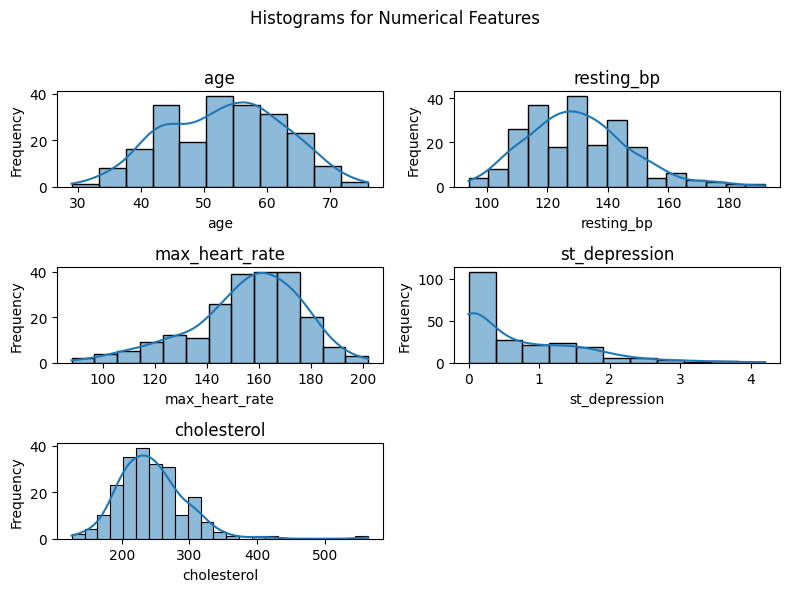

In [37]:
# Function to plot histograms for numerical features
def plot_histograms(data):
    numerical_features = ['age', 'resting_bp', 'max_heart_rate', 'st_depression', 'cholesterol']
    fig, axes = plt.subplots(3, 2, figsize=(8, 6))
    fig.suptitle('Histograms for Numerical Features')
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        sns.histplot(data[feature], kde=True, ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

    # Removing the last empty subplot
    fig.delaxes(axes[-1])
    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the histograms
plot_histograms(data)
plt.show()

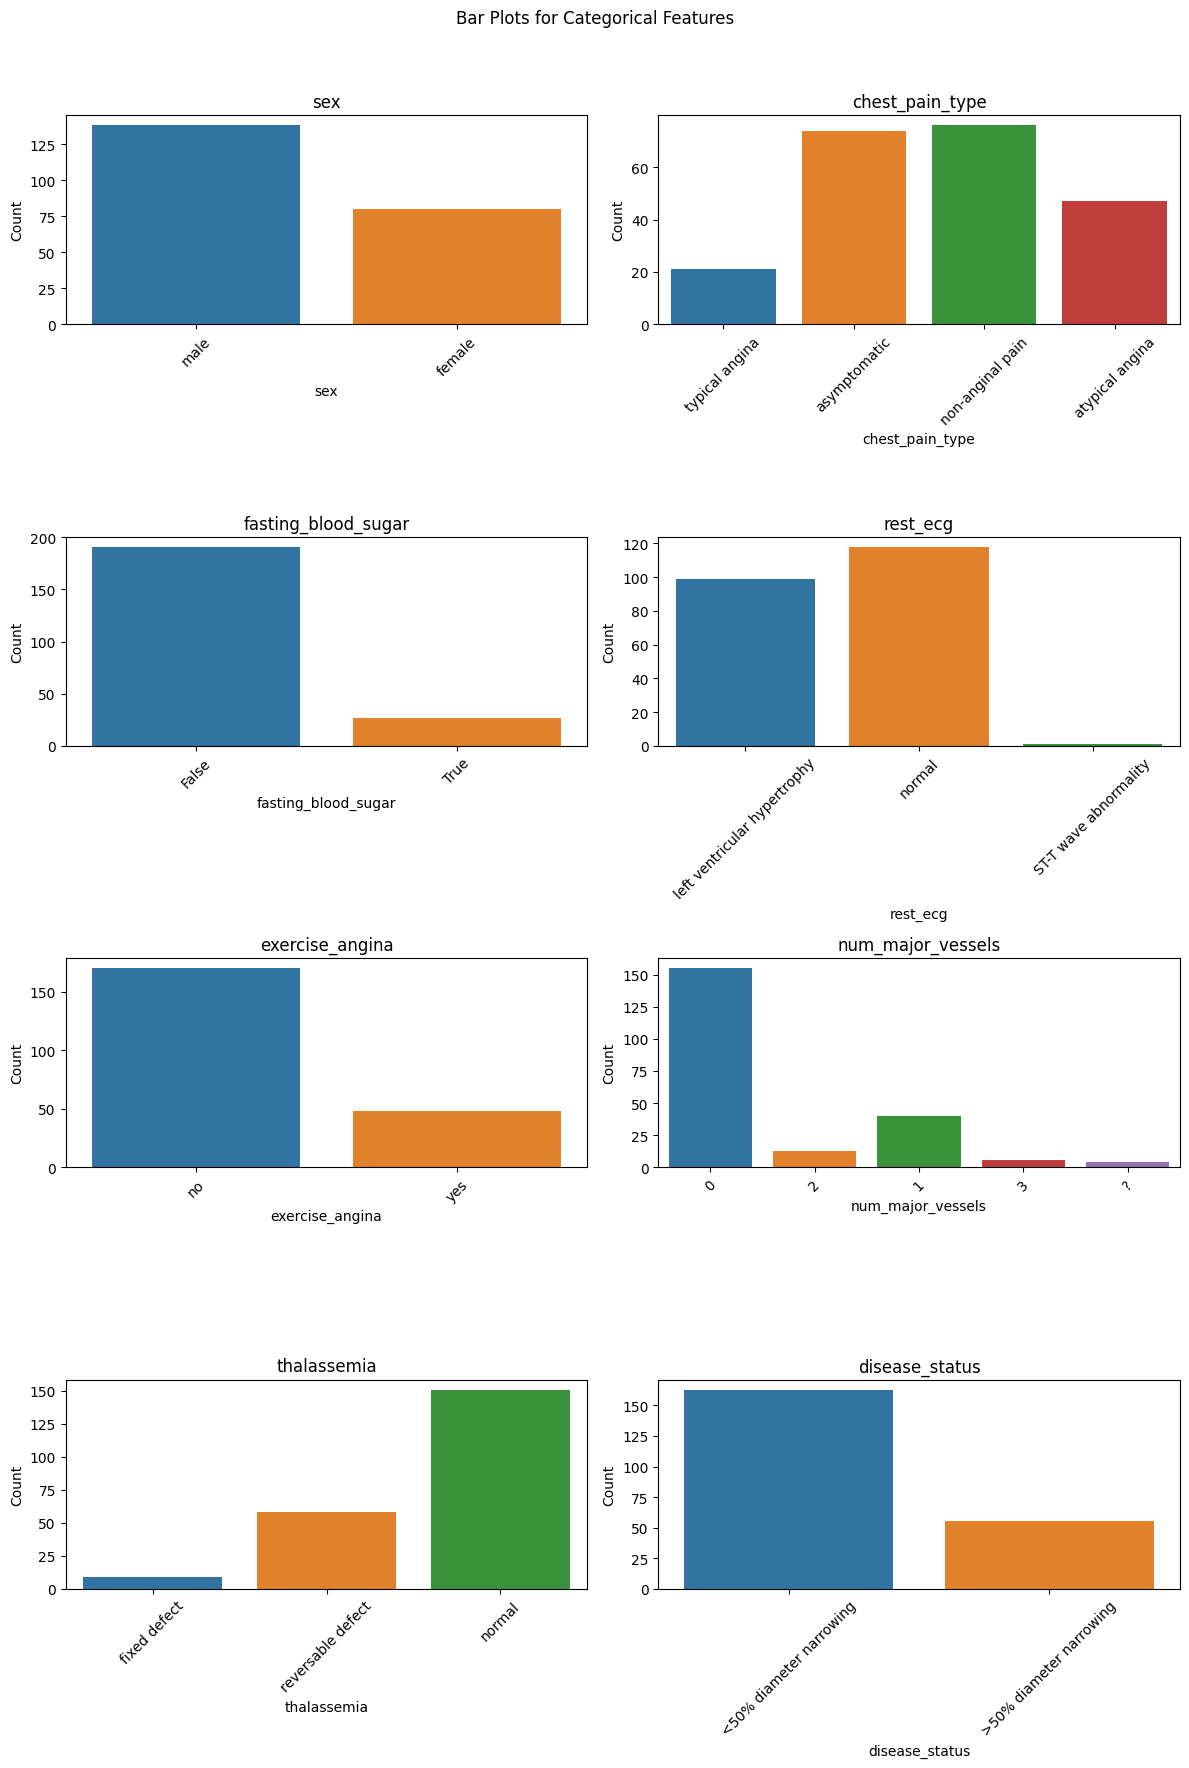

In [38]:
# Function to plot bar plots for categorical features
def plot_bar_plots(data):
    categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_angina', 'num_major_vessels', 'thalassemia', 'disease_status']
    fig, axes = plt.subplots(4, 2, figsize=(12, 18))
    fig.suptitle('Bar Plots for Categorical Features')
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        sns.countplot(x=data[feature], ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the bar plots
plot_bar_plots(data)
plt.show()

### Trying to find relation between cholestrol and other features

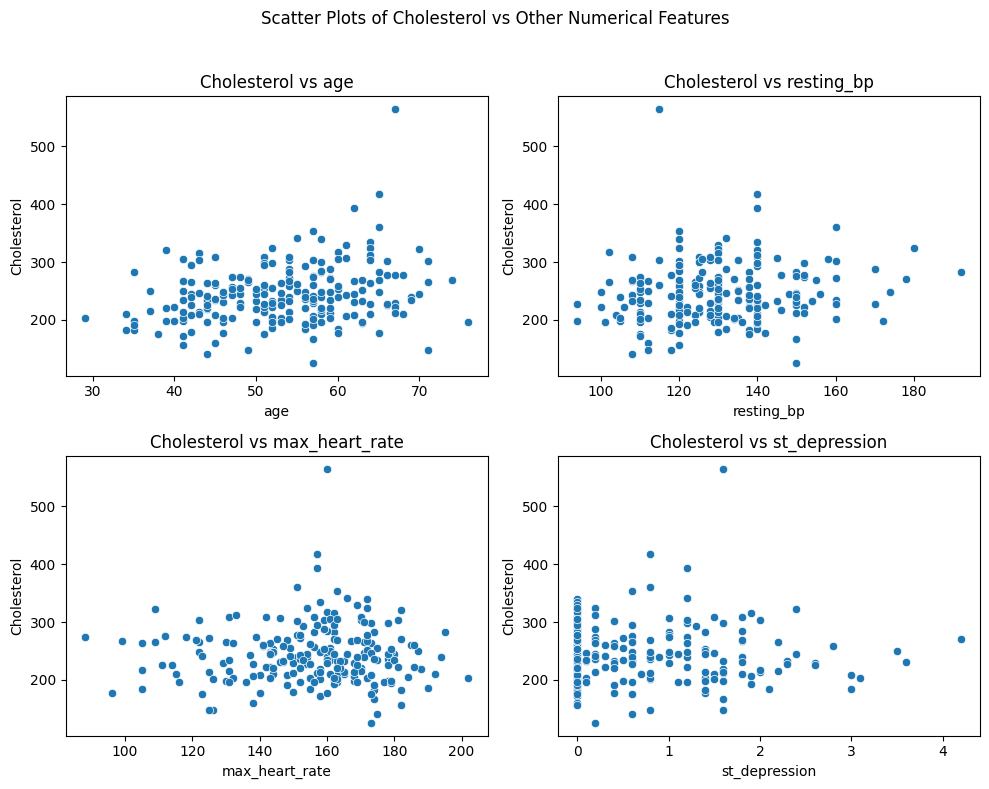

In [39]:
# Function to plot scatter plots for cholesterol vs other numerical features
def plot_scatter_plots(data):
    numerical_features = ['age', 'resting_bp', 'max_heart_rate', 'st_depression']
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    fig.suptitle('Scatter Plots of Cholesterol vs Other Numerical Features')
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        sns.scatterplot(x=data[feature], y=data['cholesterol'], ax=axes[i])
        axes[i].set_title(f'Cholesterol vs {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Cholesterol')

    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the scatter plots
plot_scatter_plots(data)
plt.show()

### 3D Plots for cholestrol with other variables

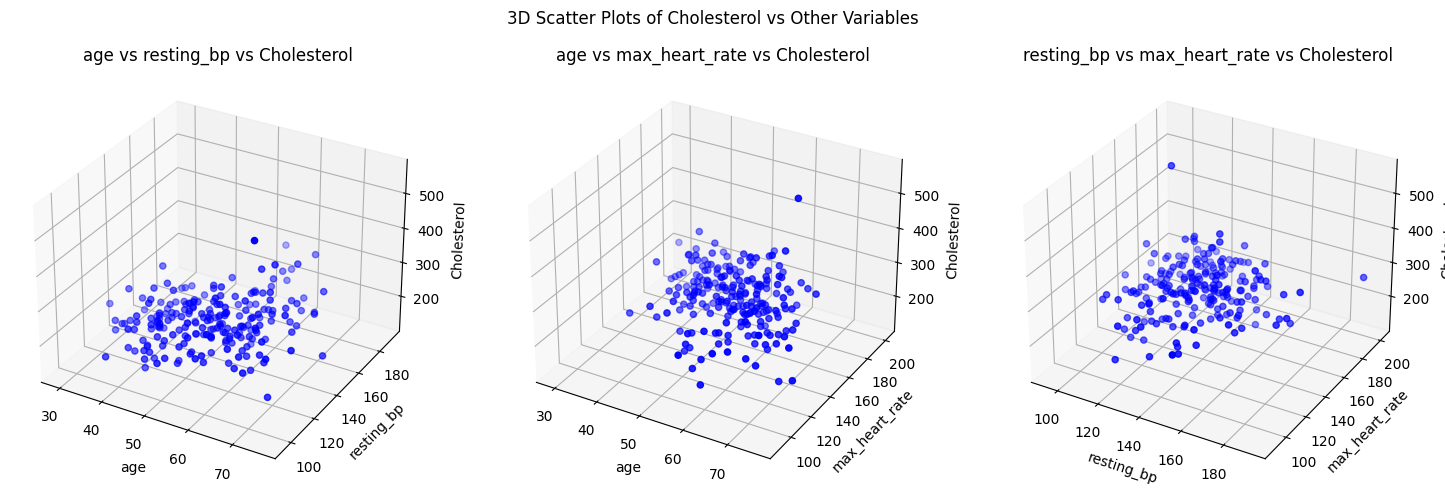

In [40]:
# Function to plot 3D scatter plots for cholesterol vs other variables
def plot_3d_scatter_plots(data):
    combinations = [
        ('age', 'resting_bp', 'cholesterol'),
        ('age', 'max_heart_rate', 'cholesterol'),
        ('resting_bp', 'max_heart_rate', 'cholesterol'),
    ]

    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('3D Scatter Plots of Cholesterol vs Other Variables')

    for i, combo in enumerate(combinations):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        ax.scatter(data[combo[0]], data[combo[1]], data[combo[2]], c='b', marker='o')
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel('Cholesterol')
        ax.set_title(f'{combo[0]} vs {combo[1]} vs Cholesterol')

    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the 3D scatter plots
plot_3d_scatter_plots(data)
plt.show()

1. Age vs Resting Blood Pressure vs Cholesterol: This plot explores the three-dimensional relationship among age, resting blood pressure, and cholesterol levels.

2. Age vs Max Heart Rate vs Cholesterol: This plot examines how cholesterol levels vary with age and maximum heart rate.

3. Resting Blood Pressure vs Max Heart Rate vs Cholesterol: This plot shows the relationship between resting blood pressure, maximum heart rate, and cholesterol levels.

### Visualization of different patterns in male and females with cholestrol level above 240(Above 240 is considered dangeorus)

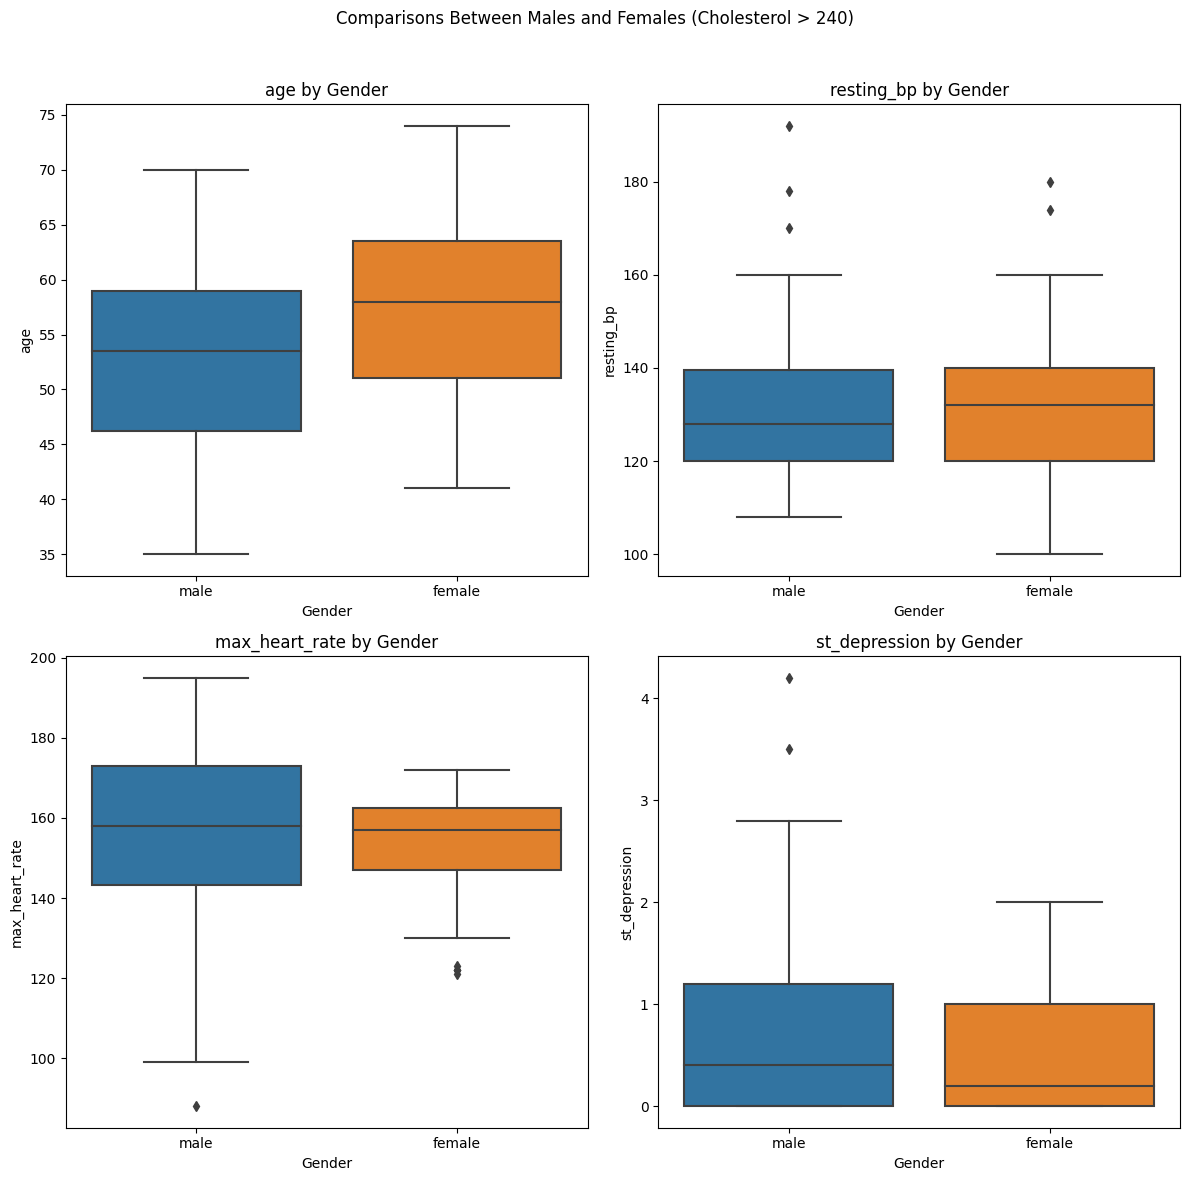

In [41]:
# Filtering the dataset for individuals with cholesterol levels above 240
filtered_data = data[data['cholesterol'] > 240]

# Function to plot comparisons between males and females for numerical features
def plot_gender_comparisons(data):
    numerical_features = ['age', 'resting_bp', 'max_heart_rate', 'st_depression']
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Comparisons Between Males and Females (Cholesterol > 240)')
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=data['sex'], y=data[feature], ax=axes[i])
        axes[i].set_title(f'{feature} by Gender')
        axes[i].set_xlabel('Gender')
        axes[i].set_ylabel(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the comparisons
plot_gender_comparisons(filtered_data)
plt.show()

1. Age: Males and females appear to have similar age distributions.
2. Resting Blood Pressure: There's a noticeable overlap between males and females, but males seem to have a slightly wider range.
3. Max Heart Rate: The distributions are similar, but females may have a slightly higher median.
4. ST Depression: The spread for males is broader, while females have a more clustered distribution.


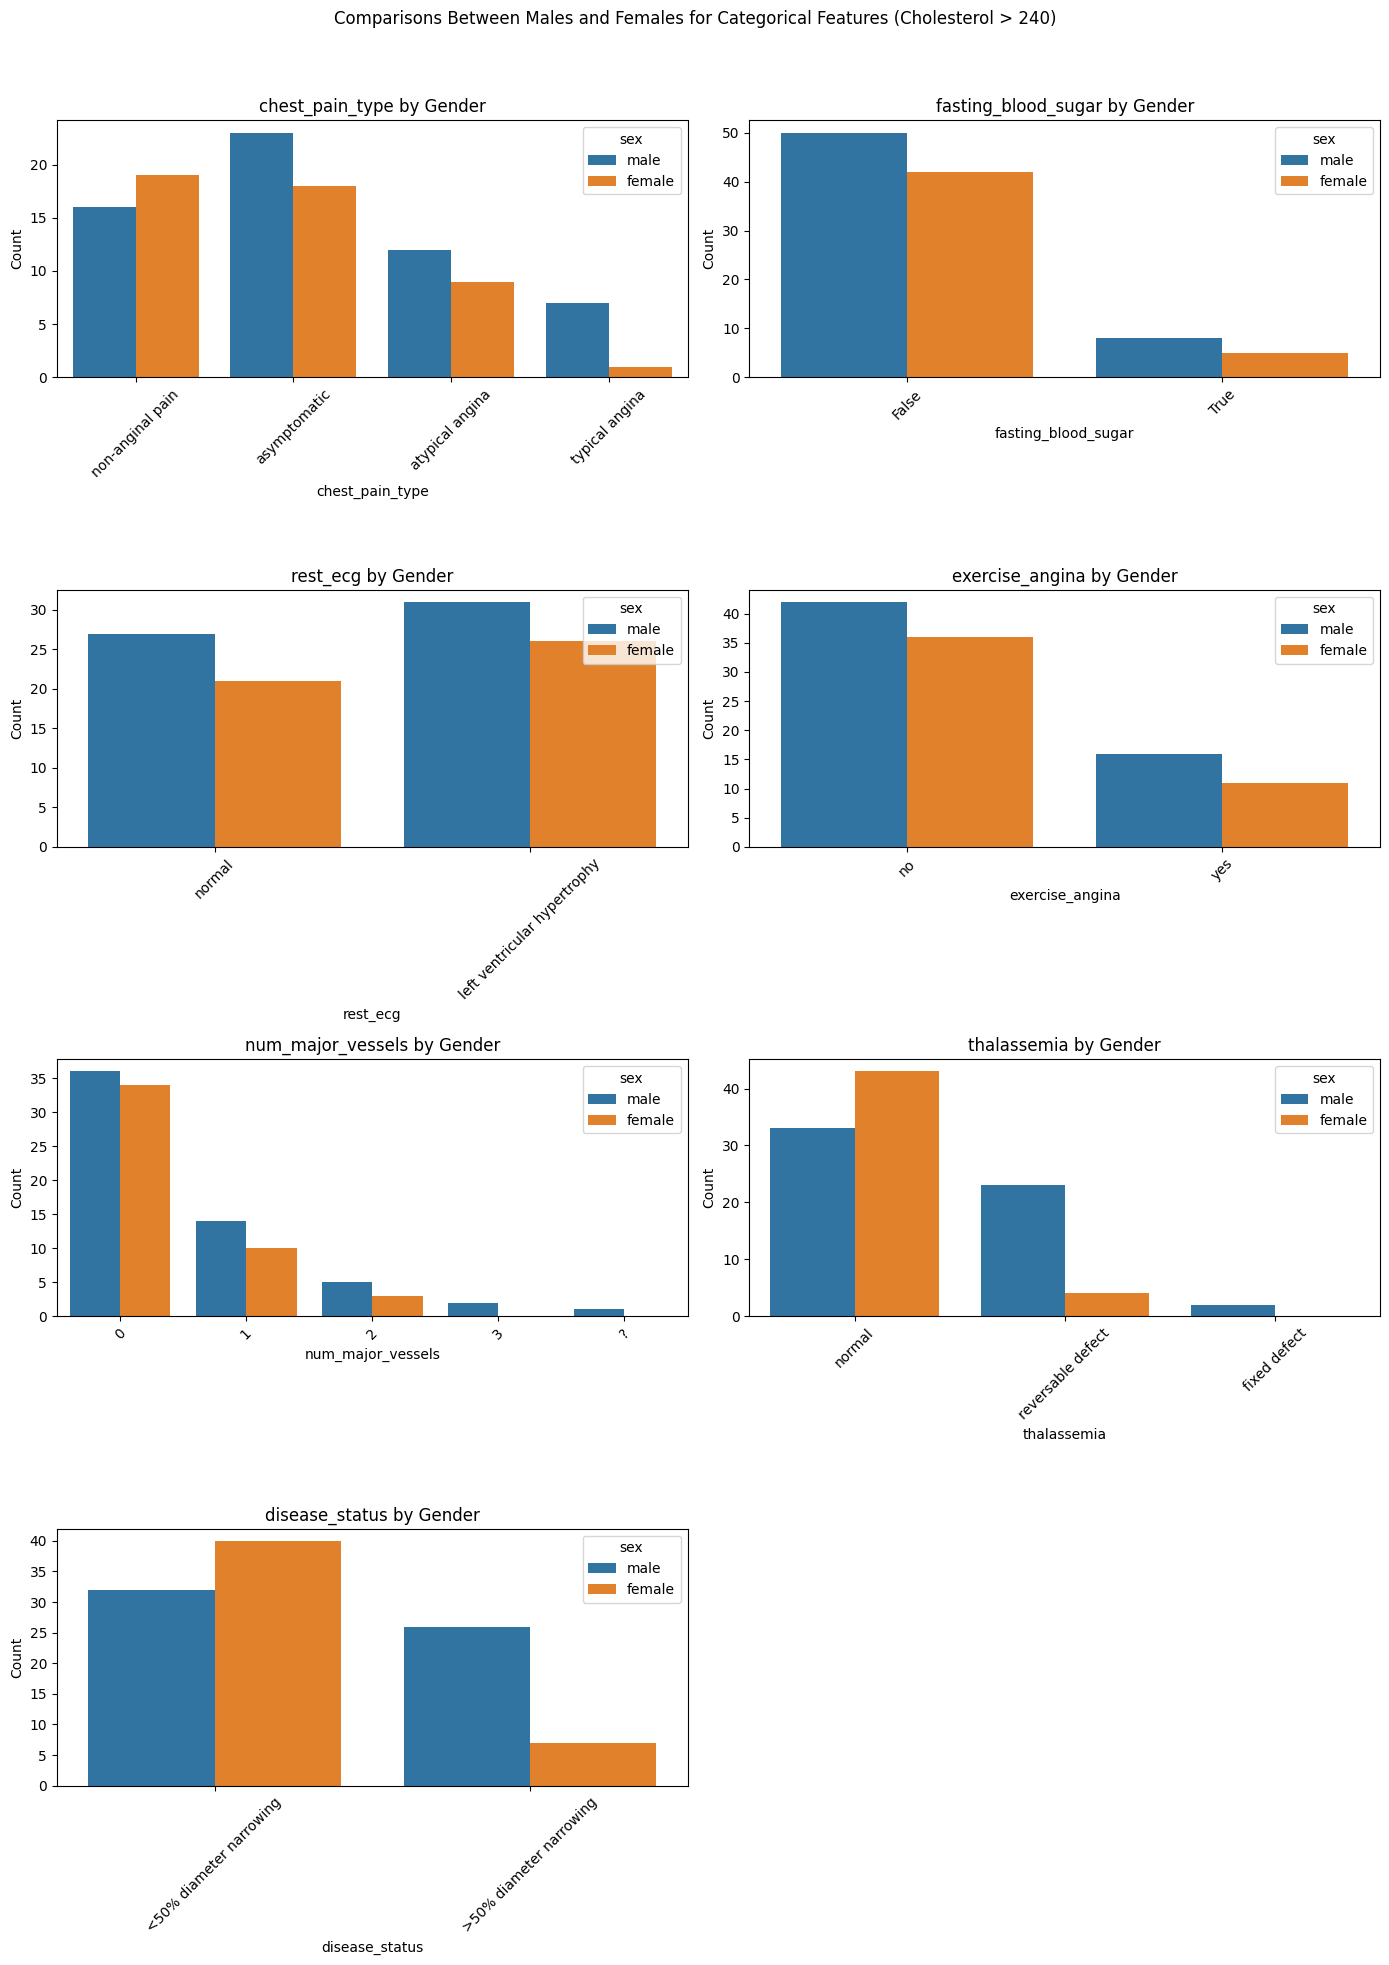

In [42]:
# Function to plot comparisons between males and females for categorical features
def plot_gender_categorical_comparisons(data):
    categorical_features = ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_angina', 'num_major_vessels', 'thalassemia', 'disease_status']
    fig, axes = plt.subplots(4, 2, figsize=(14, 20))
    fig.suptitle('Comparisons Between Males and Females for Categorical Features (Cholesterol > 240)')
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        sns.countplot(x=data[feature], hue=data['sex'], ax=axes[i])
        axes[i].set_title(f'{feature} by Gender')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Removing the last empty subplot
    fig.delaxes(axes[-1])
    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the comparisons for categorical features
plot_gender_categorical_comparisons(filtered_data)
plt.show()

1. Chest Pain Type: Differences in the distribution of chest pain types are observed between males and females.
2. Fasting Blood Sugar: Similar patterns, with more males having fasting blood sugar less than 120 mg/dl.
3. Resting ECG: Males and females show different distributions across the types of resting ECG.
4. Exercise Angina: More males than females experience exercise-induced angina.
5. Number of Major Vessels: The distribution of the number of major vessels colored by fluoroscopy varies between males and females.
6. Thalassemia: Differences in thalassemia types are observed between the genders.
7. Disease Status: Similar patterns, with most males and females having '<50% diameter narrowing'.

### Bucketing people into different age groups and trying to finding patterns

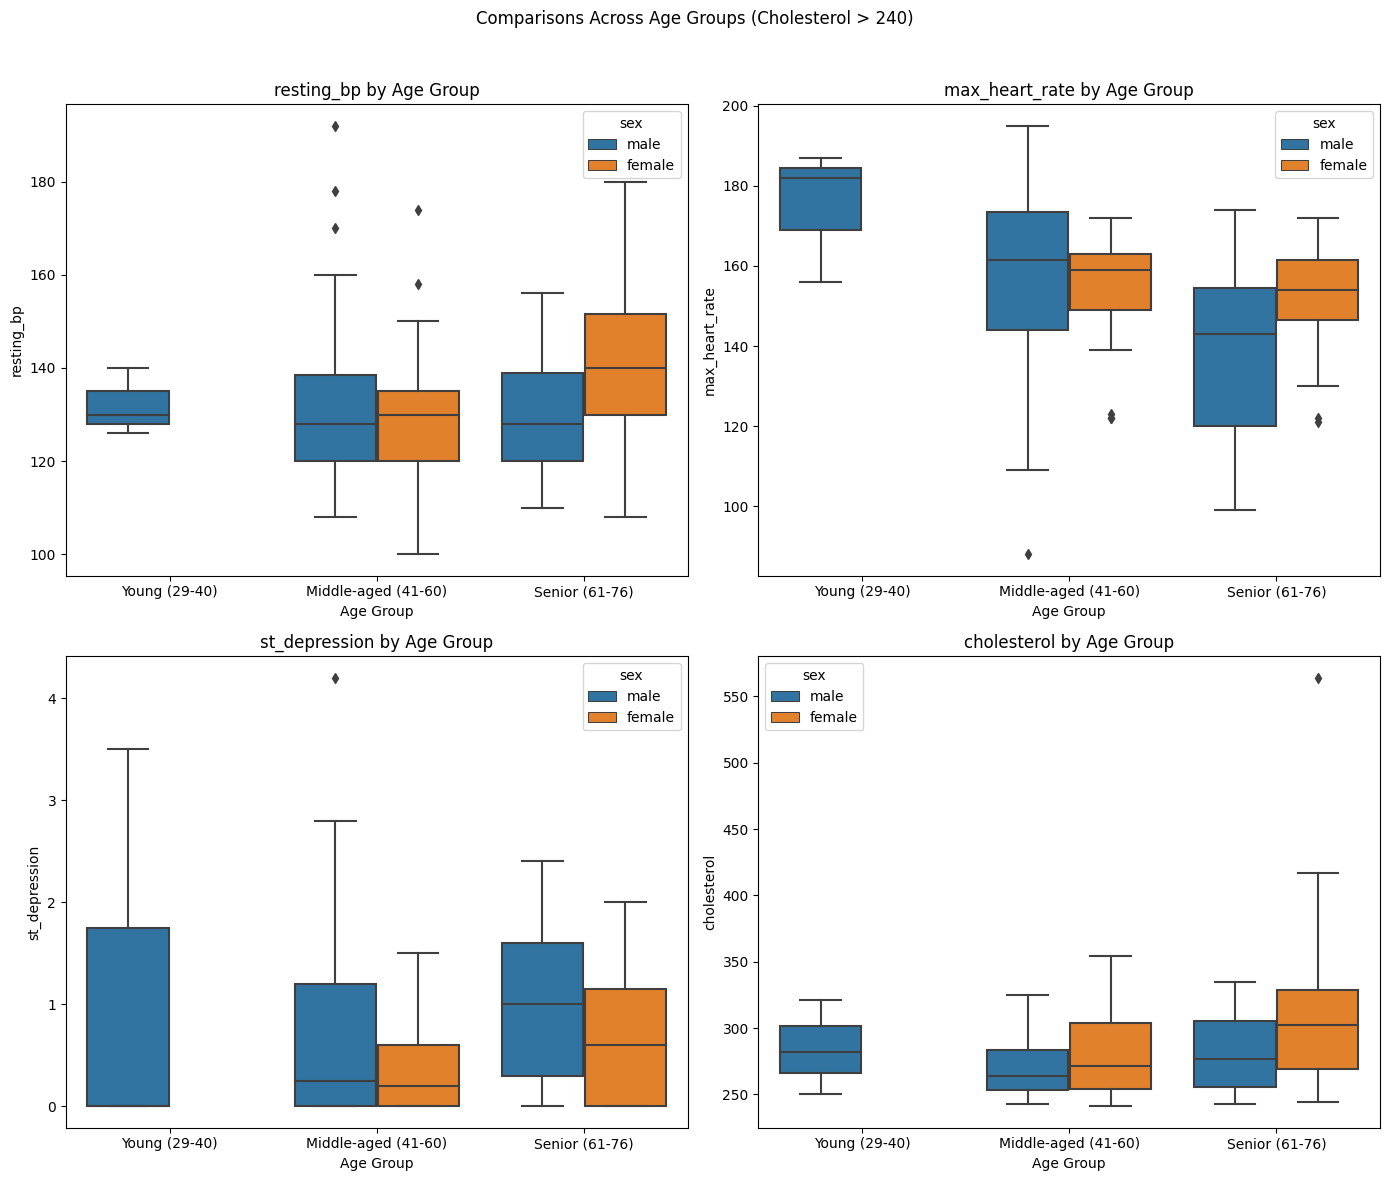

In [43]:
# Function to create age buckets
def create_age_buckets(data):
    age_bins = [29, 40, 60, 76]
    age_labels = ['Young (29-40)', 'Middle-aged (41-60)', 'Senior (61-76)']
    data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=True)
    return data

# Applying the age bucketing function to the filtered data
filtered_data_with_age_groups = create_age_buckets(filtered_data.copy())

# Function to plot comparisons across age groups for numerical features
def plot_age_group_comparisons(data):
    numerical_features = ['resting_bp', 'max_heart_rate', 'st_depression', 'cholesterol']
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Comparisons Across Age Groups (Cholesterol > 240)')
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=data['age_group'], y=data[feature], hue=data['sex'], ax=axes[i])
        axes[i].set_title(f'{feature} by Age Group')
        axes[i].set_xlabel('Age Group')
        axes[i].set_ylabel(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the comparisons across age groups for numerical features
plot_age_group_comparisons(filtered_data_with_age_groups)
plt.show()

1. Resting Blood Pressure: Slight variations across age groups are observed, with middle-aged individuals showing a broader spread.
2. Max Heart Rate: Younger individuals tend to have higher maximum heart rates, which decrease as age increases.
3. ST Depression: Similar distributions are observed across age groups, with some variations.
4. Cholesterol: Cholesterol levels appear to be similar across the age groups.

These patterns are further distinguished by gender, adding another layer of insight into how these factors vary with age.

Next, we can analyze how categorical variables like chest pain type, fasting blood sugar, resting ECG, exercise angina, etc., differ across age groups.

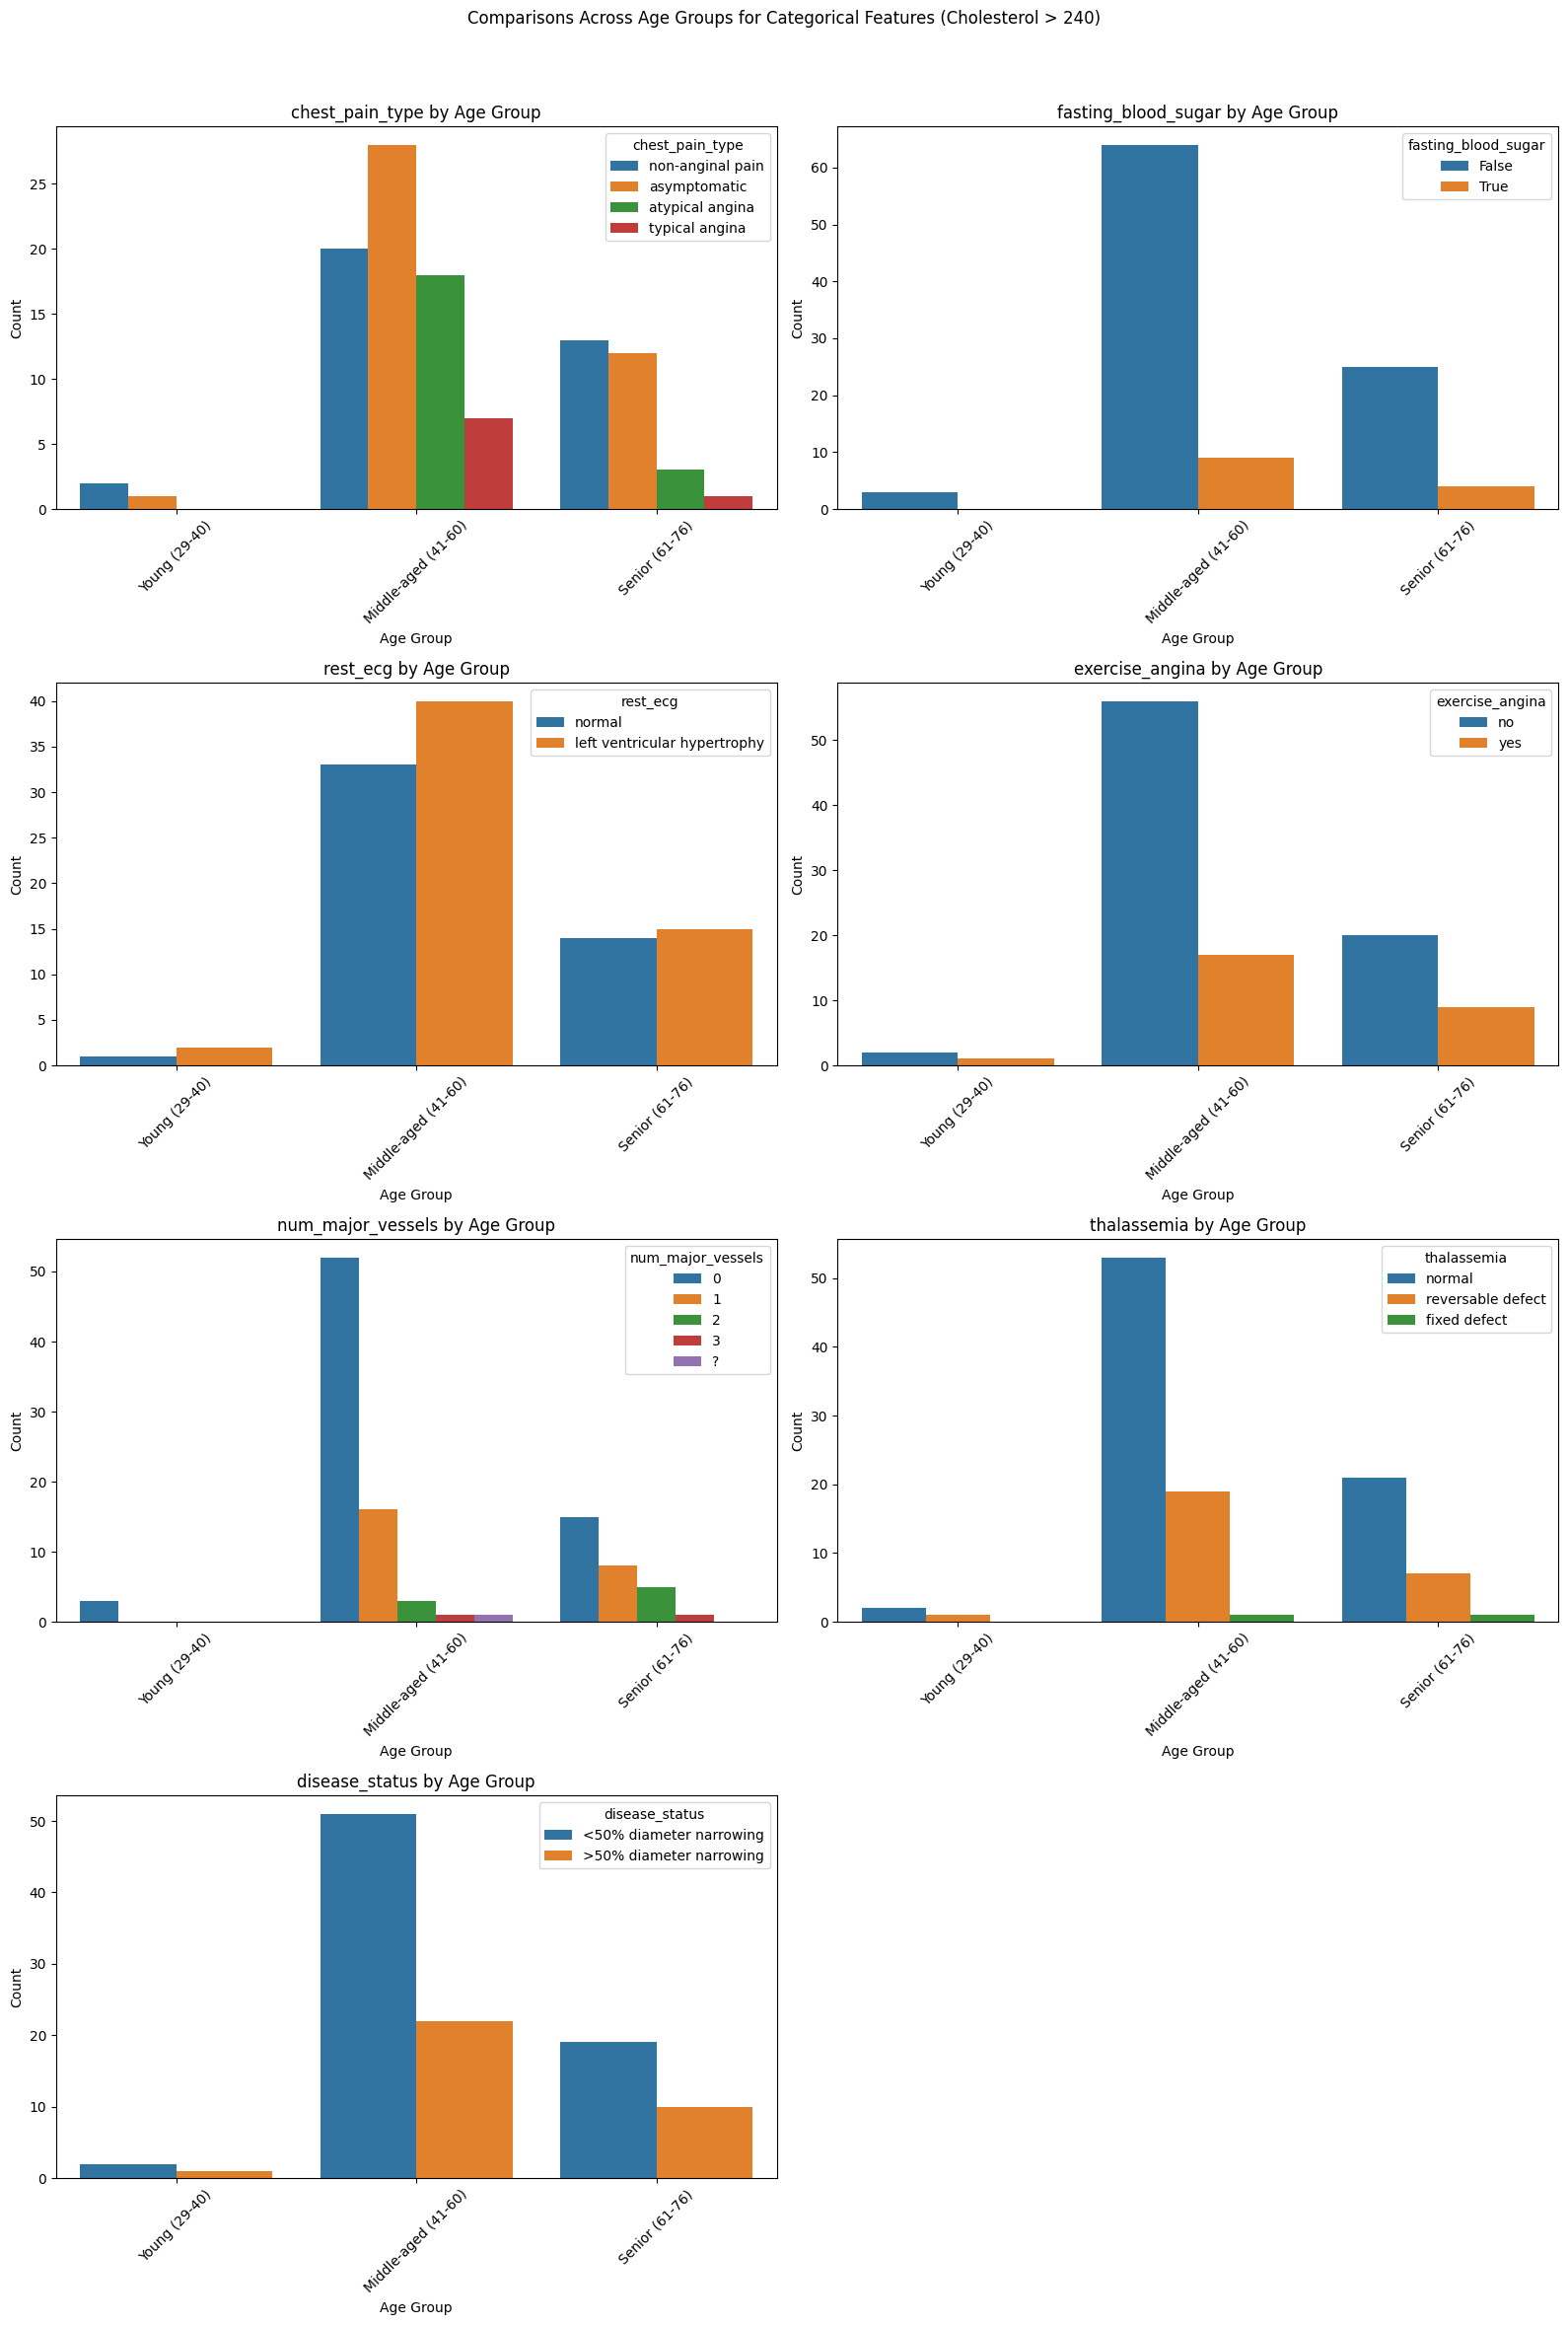

In [44]:
# Function to plot comparisons across age groups for categorical features
def plot_age_group_categorical_comparisons(data):
    categorical_features = ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_angina', 'num_major_vessels', 'thalassemia', 'disease_status']
    fig, axes = plt.subplots(4, 2, figsize=(16, 24))
    fig.suptitle('Comparisons Across Age Groups for Categorical Features (Cholesterol > 240)')
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        sns.countplot(x=data['age_group'], hue=data[feature], ax=axes[i])
        axes[i].set_title(f'{feature} by Age Group')
        axes[i].set_xlabel('Age Group')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Removing the last empty subplot
    fig.delaxes(axes[-1])
    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plotting the comparisons across age groups for categorical features
plot_age_group_categorical_comparisons(filtered_data_with_age_groups)
plt.show()

1. Chest Pain Type: The distribution of chest pain types varies across age groups, with different patterns observed for young, middle-aged, and senior individuals.
2. Fasting Blood Sugar: Similar patterns across age groups, with most individuals having fasting blood sugar less than 120 mg/dl.
3. Resting ECG: Variations in resting ECG types are noticeable across age groups.
4. Exercise Angina: Exercise-induced angina patterns are different across age groups.
5. Number of Major Vessels: The distribution of the number of major vessels colored by fluoroscopy differs across age groups.
6. Thalassemia: Differences in thalassemia types are observed across age groups.
7. Disease Status: Similar patterns, with most individuals in each age group having '<50% diameter narrowing'.

**Young (29-40)**



**Males and Females:**
Similar cholesterol levels.
Higher maximum heart rates compared to other age groups.
Chest pain types, resting ECG, and exercise angina differ between males and females.
Most individuals have fasting blood sugar less than 120 mg/dl.


**Middle-aged (41-60)**

**Males:**
Slightly higher resting blood pressure spread.
More likely to experience exercise-induced angina.
Higher frequency of 'non-anginal pain' chest pain type.
Mostly 'normal' thalassemia type.

**Females:** Similar cholesterol levels to males.
Lower frequency of exercise-induced angina compared to males.
Chest pain types, resting ECG, and thalassemia vary from males.


**Senior (61-76)**

**Males and Females:**
Resting blood pressure and cholesterol levels are similar across genders.
Decreased maximum heart rates compared to younger age groups.
Differences in chest pain types, resting ECG, and exercise angina between genders.
Most have 'normal' thalassemia type.


### Correlation with Cholestrol

<ipython-input-45-45a1f654d0aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


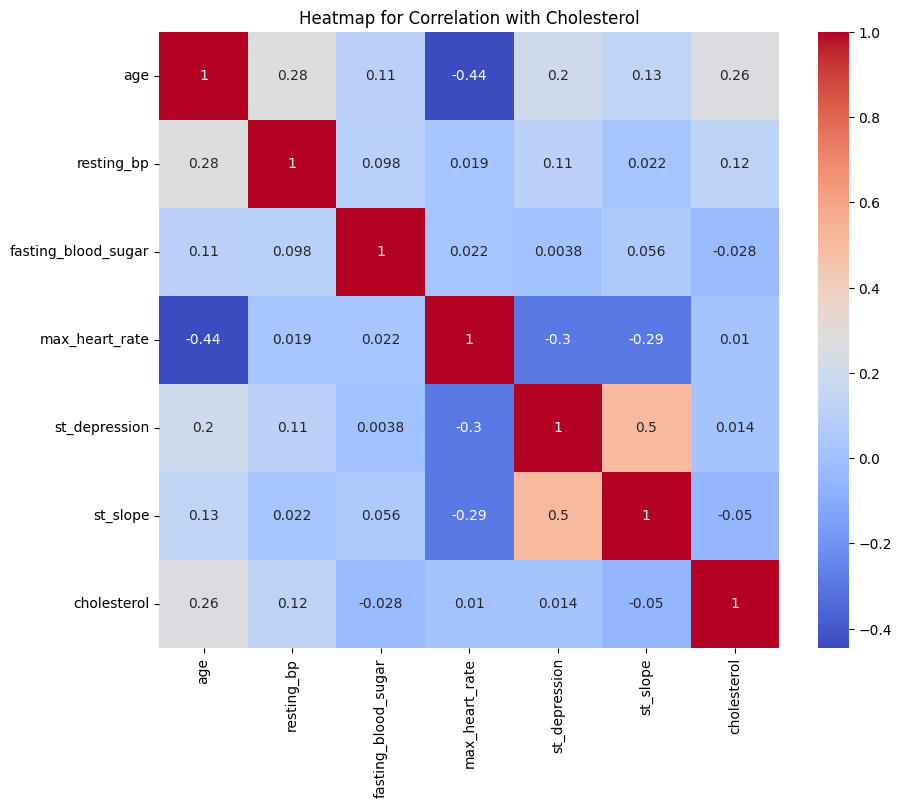

cholesterol            1.000000
age                    0.264676
resting_bp             0.122830
st_depression          0.014253
max_heart_rate         0.010025
fasting_blood_sugar   -0.027744
st_slope              -0.050386
Name: cholesterol, dtype: float64

In [45]:
# Calculating the correlation matrix focusing on cholesterol
correlation_matrix = data.corr()
cholesterol_correlation = correlation_matrix['cholesterol'].sort_values(ascending=False)

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation with Cholesterol')
plt.show()

# Returning the correlation values for cholesterol
cholesterol_correlation

Correlation of cholestrol with age is moderately strong signifying increase age may lead to cholestrol increase in blood

### Multivariate analysis of Cholestrol

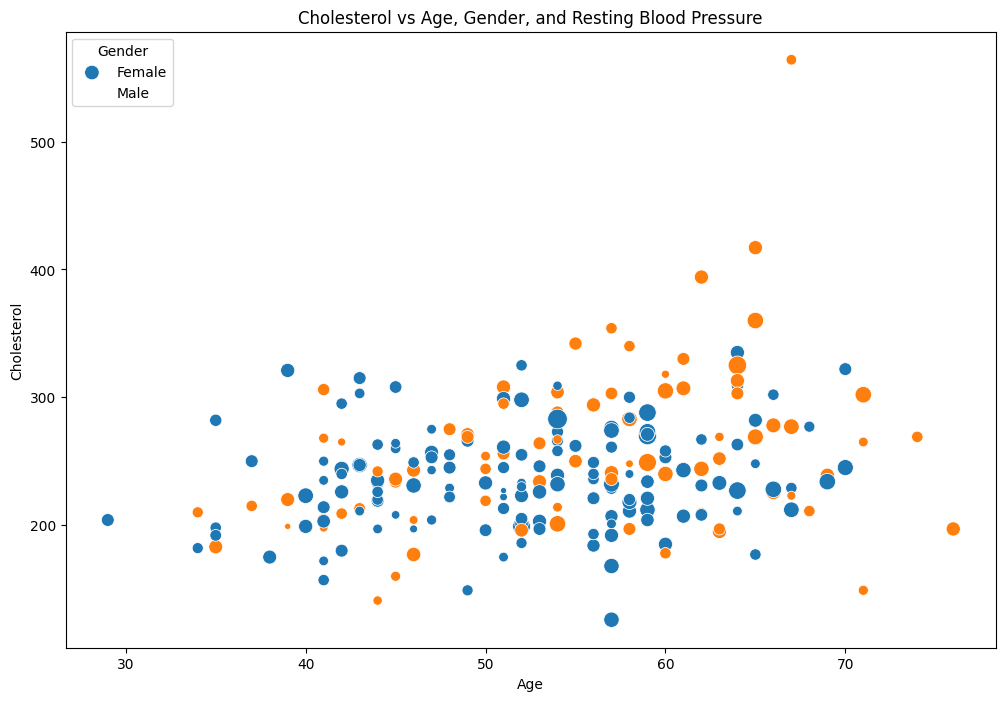

In [46]:
# Function to plot multivariate analysis for cholesterol vs age, gender, and resting blood pressure
def plot_multivariate_analysis(data):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='age', y='cholesterol', hue='sex', size='resting_bp', sizes=(20, 200), data=data)
    plt.title('Cholesterol vs Age, Gender, and Resting Blood Pressure')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper left')
    plt.show()

# Plotting the multivariate analysis
plot_multivariate_analysis(data)

### Simple linear regression

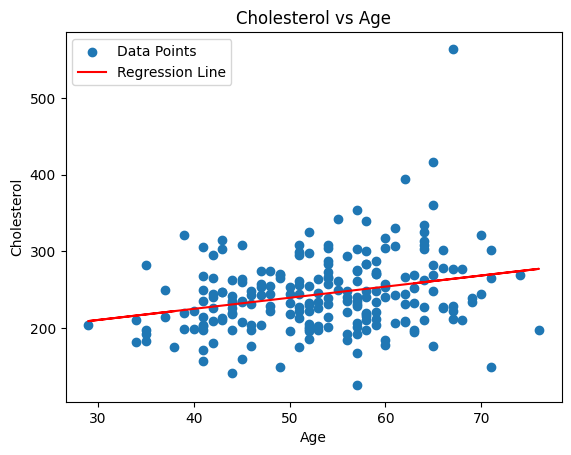

(1.4504477893534329,
 167.1015964728494,
 0.07005323779489539,
 7.614882076865732e-05)

In [47]:
# Function to perform simple linear regression and return results
def simple_linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value**2, p_value

# Performing simple linear regression for cholesterol vs. age
slope_age, intercept_age, r_squared_age, p_value_age = simple_linear_regression(data['age'], data['cholesterol'])

# Plotting the regression line
plt.scatter(data['age'], data['cholesterol'], label='Data Points')
plt.plot(data['age'], intercept_age + slope_age * data['age'], color='red', label='Regression Line')
plt.title('Cholesterol vs Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

# Returning the regression results
slope_age, intercept_age, r_squared_age, p_value_age

### Multi Linear Regression

In [48]:
# Selecting independent variables
independent_vars = ['age', 'resting_bp', 'max_heart_rate', 'sex']

# Converting 'sex' variable to numerical representation (0 for female, 1 for male)
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)

# Selecting independent variables
X = data[independent_vars]

# Dependent variable (cholesterol)
y = data['cholesterol']

# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cholesterol   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     7.122
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.12e-05
Time:                        00:01:22   Log-Likelihood:                -1150.7
No. Observations:                 218   AIC:                             2311.
Df Residuals:                     213   BIC:                             2328.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             98.7766     44.657      2.212      0.028      10.750     186.804
age                1.5960      0.422      3.786      0.000       0.765       2.427
resting_bp         0.1256      0.205      0.611      0.542      -0.279       0.531
max_heart_rate     0.3553      0.178      1.992      0.048       0.004       0.707
sex              -17.4178      6.852     -2.542      0.012     -30.925      -3.910
==============================================================================
Omnibus:                       66.924   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.773
Skew:                           1.113   Prob(JB):                     7.33e-69
Kurtosis:                       8.439   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Anomaly Detection

In [49]:
# Selecting numerical features for anomaly detection
numerical_features = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'st_depression']
data_numerical = data[numerical_features]

# Standardizing the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Initializing the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # Setting contamination to estimate the proportion of outliers

# Fitting the model
isolation_forest.fit(data_scaled)

# Predicting the anomalies (outliers are marked with -1)
anomaly_predictions = isolation_forest.predict(data_scaled)

# Adding the anomaly predictions to the original dataset
data['anomaly'] = anomaly_predictions

# Number of detected anomalies
num_anomalies = (anomaly_predictions == -1).sum()
num_anomalies

11

In [50]:
# Separating the anomalies and non-anomalies
anomalies_data = data[data['anomaly'] == -1]
non_anomalies_data = data[data['anomaly'] == 1]

# Statistical summary of anomalies for numerical features
anomalies_summary = anomalies_data[numerical_features].describe()

# Statistical summary of non-anomalies for numerical features
non_anomalies_summary = non_anomalies_data[numerical_features].describe()

# Combining the summaries for comparison
anomalies_vs_non_anomalies_summary = pd.concat([anomalies_summary, non_anomalies_summary], keys=['Anomalies', 'Non-Anomalies'])
anomalies_vs_non_anomalies_summary

age  resting_bp  cholesterol  max_heart_rate  \
Anomalies     count   11.000000   11.000000    11.000000       11.000000   
              mean    56.181818  141.909091   273.000000      153.454545   
              std     15.263146   29.686544   110.601085       30.955980   
              min     29.000000  104.000000   149.000000      109.000000   
              25%     45.500000  122.500000   206.000000      135.000000   
              50%     59.000000  130.000000   250.000000      148.000000   
              75%     68.500000  164.000000   302.500000      173.500000   
              max     76.000000  192.000000   564.000000      202.000000   
Non-Anomalies count  207.000000  207.000000   207.000000      207.000000   
              mean    53.135266  129.647343   242.874396      155.541063   
              std      8.840609   15.676532    45.399026       20.119473   
              min     34.000000   94.000000   126.000000       88.000000   
              25%     46.000000  120.000000   211.000000      144.000000   
              50%     54.000000  130.000000   239.000000      159.000000   
              75%     59.000000  140.000000   269.000000      170.500000   
              max     74.000000  174.000000   417.000000      194.000000   

                     st_depression  
Anomalies     count      11.000000  
              mean        1.909091  
              std         1.544315  
              min         0.000000  
              25%         0.550000  
              50%         1.600000  
              75%         3.250000  
              max         4.200000  
Non-Anomalies count     207.000000  
              mean        0.630435  
              std         0.759146  
              min         0.000000  
              25%         0.000000  
              50%         0.300000  
              75%         1.200000  
              max         3.100000

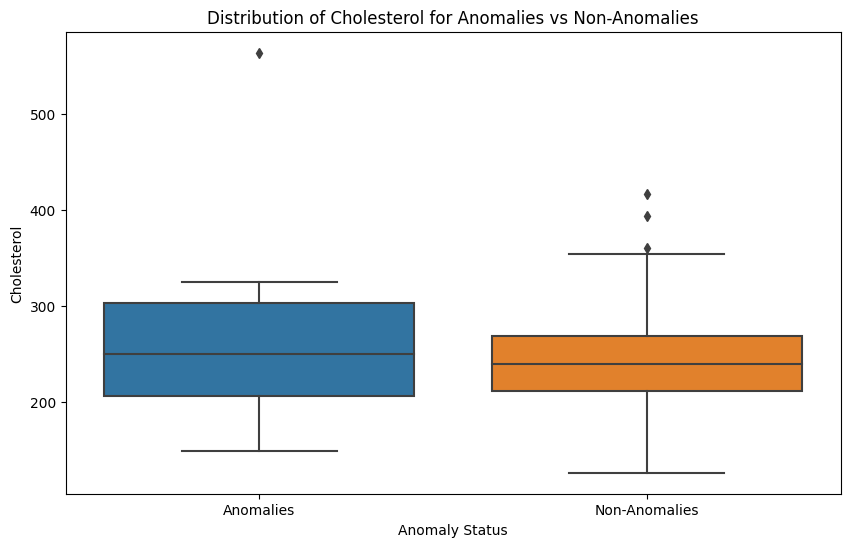

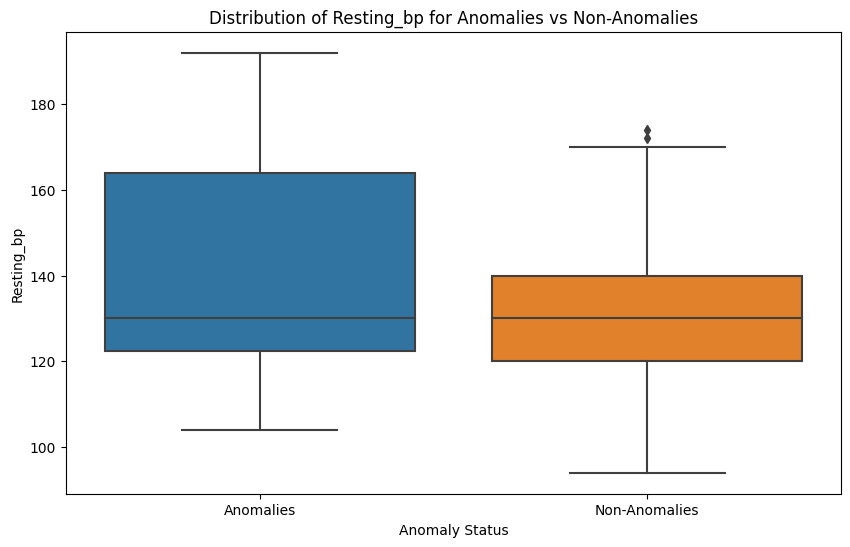

In [51]:
# Function to visualize anomalies vs non-anomalies for a given feature
def visualize_anomalies(feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='anomaly', y=feature, data=data)
    plt.title(f'Distribution of {feature.capitalize()} for Anomalies vs Non-Anomalies')
    plt.xlabel('Anomaly Status')
    plt.xticks(ticks=[0, 1], labels=['Anomalies', 'Non-Anomalies'])
    plt.ylabel(feature.capitalize())
    plt.show()

# Visualizing cholesterol levels for anomalies vs non-anomalies
visualize_anomalies('cholesterol')

# Visualizing resting blood pressure for anomalies vs non-anomalies
visualize_anomalies('resting_bp')

**Cholesterol Levels:**
Anomalies display a broader range of cholesterol levels, including some very high values.
This could indicate individuals with hypercholesterolemia or other conditions leading to elevated cholesterol levels.

**Resting Blood Pressure:**
Similar to cholesterol, anomalies have a wider range of resting blood pressure values, including some notably high and low values.
This variability might reflect underlying cardiovascular conditions or other health-related factors.

# Conclusion:

**Key Insights:** Age and gender emerged as vital factors influencing cholesterol levels, with specific anomalies indicating potential outliers or unique cases.

**Interconnected Relationships:** The data revealed complex and interconnected relationships that can be explored further using different models and approaches.

**Clinical and Healthcare Implications:** The findings could be valuable for healthcare professionals for prediction, risk assessment, and personalized interventions.